### Libraries import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

### Style

In [3]:
from matplotlib import font_manager

font_dirs = ['style/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
  font_manager.fontManager.addfont(font_file)

plt.style.use('default')
plt.style.use('style/style.mplstyle')

### Data import

In [4]:
dataset = pd.read_csv('./../data/fuoriuscita/vittime_1522/Vittime - sesso, tipo violenza, stato d’animo della vittima (2013-2022).csv')

dataset

,ITTER107,Territorio,TIPO_DATO_1522,Tipo dato,SEXISTAT1,Sesso,TIPOVIOLENZA,Tipo di violenza,STATI_MORBOSI,Stato d'animo,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,IT,Italia,VICTIMS,vittime di violenza,M,maschi,PHY,violenza fisica,ALL,tutte le voci,2013,2013,434,NaN,NaN
1,IT,Italia,VICTIMS,vittime di violenza,M,maschi,PHY,violenza fisica,ALL,tutte le voci,2014,2014,110,NaN,NaN
2,IT,Italia,VICTIMS,vittime di violenza,M,maschi,PHY,violenza fisica,ALL,tutte le voci,2015,2015,67,NaN,NaN
3,IT,Italia,VICTIMS,vittime di violenza,M,maschi,PHY,violenza fisica,ALL,tutte le voci,2016,2016,80,NaN,NaN
4,IT,Italia,VICTIMS,vittime di violenza,M,maschi,PHY,violenza fisica,ALL,tutte le voci,2017,2017,66,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,IT,Italia,VICTIMS,vittime di violenza,NRP,non indicato,UNAV,non disponibile,UNAV,non disponibile,2015,2015,1,NaN,NaN
2289,IT,Italia,VICTIMS,vittime di violenza,NRP,non indicato,UNAV,non disponibile,UNAV,non disponibile,2019,2019,2,NaN,NaN
2290,IT,Italia,VICTIMS,vittime di violenza,NRP,non indicato,UNAV,non disponibile,UNAV,non disponibile,2020,2020,9,NaN,NaN
2291,IT,Italia,VICTIMS,vittime di violenza,NRP,non indicato,UNAV,non disponibile,UNAV,non disponibile,2021,2021,12,NaN,NaN


Pulizia dei dati (rimozione campi inutili):

In [5]:
# rimuovo le colonne:
# - "ITTER107" e "Territorio" in quanto i dati sono solo a livello nazionale e non vi è distinzione regionale
# - "Flag Codes" e "Flags" in quanto semplicemente inutili
# - "Tipo dato" e "TIPO_DATO_1522" in quanto il dato è sempre di vittime di violenza
dataset['TIPO_DATO_1522'].drop_duplicates()

drop_column_names = ['ITTER107', 'Territorio', 'Flag Codes', 'Flags', 'Tipo dato', 'TIPO_DATO_1522']
dataset.drop(columns=drop_column_names, inplace=True)

dataset

,SEXISTAT1,Sesso,TIPOVIOLENZA,Tipo di violenza,STATI_MORBOSI,Stato d'animo,TIME,Seleziona periodo,Value
0,M,maschi,PHY,violenza fisica,ALL,tutte le voci,2013,2013,434
1,M,maschi,PHY,violenza fisica,ALL,tutte le voci,2014,2014,110
2,M,maschi,PHY,violenza fisica,ALL,tutte le voci,2015,2015,67
3,M,maschi,PHY,violenza fisica,ALL,tutte le voci,2016,2016,80
4,M,maschi,PHY,violenza fisica,ALL,tutte le voci,2017,2017,66
...,...,...,...,...,...,...,...,...,...
2288,NRP,non indicato,UNAV,non disponibile,UNAV,non disponibile,2015,2015,1
2289,NRP,non indicato,UNAV,non disponibile,UNAV,non disponibile,2019,2019,2
2290,NRP,non indicato,UNAV,non disponibile,UNAV,non disponibile,2020,2020,9
2291,NRP,non indicato,UNAV,non disponibile,UNAV,non disponibile,2021,2021,12


Rimozione dei dati non disponibili, delle aggregazioni di stato d'animo e delle distinizioni sul tipo di violenza:

In [6]:
dataset = dataset[(dataset['SEXISTAT1'] != 'NRP') & (dataset['TIPOVIOLENZA'] != 'UNAV') 
                  & (dataset['STATI_MORBOSI'] != 'UNAV') & (dataset['STATI_MORBOSI'] != 'ALL')
                  & (dataset['TIPOVIOLENZA'] == 'ALL')]
dataset

,SEXISTAT1,Sesso,TIPOVIOLENZA,Tipo di violenza,STATI_MORBOSI,Stato d'animo,TIME,Seleziona periodo,Value
279,T,totale,ALL,tutte le voci,FEAR_DEATH,paura di morire,2013,2013,1083
280,T,totale,ALL,tutte le voci,FEAR_DEATH,paura di morire,2014,2014,819
281,T,totale,ALL,tutte le voci,FEAR_DEATH,paura di morire,2015,2015,497
282,T,totale,ALL,tutte le voci,FEAR_DEATH,paura di morire,2016,2016,741
283,T,totale,ALL,tutte le voci,FEAR_DEATH,paura di morire,2017,2017,465
...,...,...,...,...,...,...,...,...,...
1989,F,femmine,ALL,tutte le voci,NRP,non risponde,2018,2018,88
1990,F,femmine,ALL,tutte le voci,NRP,non risponde,2019,2019,70
1991,F,femmine,ALL,tutte le voci,NRP,non risponde,2020,2020,133
1992,F,femmine,ALL,tutte le voci,NRP,non risponde,2021,2021,125


Separazione dei dati per sesso:

In [7]:
males_data = dataset[dataset['SEXISTAT1'] == 'M'].drop(columns=['SEXISTAT1', 'Sesso'])
males_data

,TIPOVIOLENZA,Tipo di violenza,STATI_MORBOSI,Stato d'animo,TIME,Seleziona periodo,Value
888,ALL,tutte le voci,FEAR_DEATH,paura di morire,2013,2013,57
889,ALL,tutte le voci,FEAR_DEATH,paura di morire,2014,2014,19
890,ALL,tutte le voci,FEAR_DEATH,paura di morire,2015,2015,14
891,ALL,tutte le voci,FEAR_DEATH,paura di morire,2016,2016,25
892,ALL,tutte le voci,FEAR_DEATH,paura di morire,2017,2017,9
...,...,...,...,...,...,...,...
1302,ALL,tutte le voci,NRP,non risponde,2018,2018,6
1303,ALL,tutte le voci,NRP,non risponde,2019,2019,1
1304,ALL,tutte le voci,NRP,non risponde,2020,2020,8
1305,ALL,tutte le voci,NRP,non risponde,2021,2021,4


In [8]:
females_data = dataset[dataset['SEXISTAT1'] == 'F'].drop(columns=['SEXISTAT1', 'Sesso'])
females_data

,TIPOVIOLENZA,Tipo di violenza,STATI_MORBOSI,Stato d'animo,TIME,Seleziona periodo,Value
1439,ALL,tutte le voci,FEAR_DEATH,paura di morire,2013,2013,1016
1440,ALL,tutte le voci,FEAR_DEATH,paura di morire,2014,2014,800
1441,ALL,tutte le voci,FEAR_DEATH,paura di morire,2015,2015,483
1442,ALL,tutte le voci,FEAR_DEATH,paura di morire,2016,2016,716
1443,ALL,tutte le voci,FEAR_DEATH,paura di morire,2017,2017,456
...,...,...,...,...,...,...,...
1989,ALL,tutte le voci,NRP,non risponde,2018,2018,88
1990,ALL,tutte le voci,NRP,non risponde,2019,2019,70
1991,ALL,tutte le voci,NRP,non risponde,2020,2020,133
1992,ALL,tutte le voci,NRP,non risponde,2021,2021,125


In [9]:
all_genders_data = dataset[dataset['SEXISTAT1'] == 'T'].drop(columns=['SEXISTAT1', 'Sesso'])
all_genders_data

,TIPOVIOLENZA,Tipo di violenza,STATI_MORBOSI,Stato d'animo,TIME,Seleziona periodo,Value
279,ALL,tutte le voci,FEAR_DEATH,paura di morire,2013,2013,1083
280,ALL,tutte le voci,FEAR_DEATH,paura di morire,2014,2014,819
281,ALL,tutte le voci,FEAR_DEATH,paura di morire,2015,2015,497
282,ALL,tutte le voci,FEAR_DEATH,paura di morire,2016,2016,741
283,ALL,tutte le voci,FEAR_DEATH,paura di morire,2017,2017,465
...,...,...,...,...,...,...,...
811,ALL,tutte le voci,NRP,non risponde,2018,2018,94
812,ALL,tutte le voci,NRP,non risponde,2019,2019,71
813,ALL,tutte le voci,NRP,non risponde,2020,2020,141
814,ALL,tutte le voci,NRP,non risponde,2021,2021,129


### Plot

Definizione delle colormap da utilizzare nelle heatmap:

In [10]:
# converte il colore da esadecimale a rgb
def hex_to_rgb(hex_color):
  if hex_color.startswith('#'): # rimozione del cancelletto se presente
    hex_color = hex_color[1:]
  return [int(hex_color[0:2], 16) / 255, int(hex_color[2:4], 16) / 255, int(hex_color[4:6], 16) / 255]

# crea la cmap dal colore lighter al darker e gli assegna il nome fornito
def create_colormap(name, lighter, darker):
  return mcolors.LinearSegmentedColormap.from_list(name, [lighter, darker], N=100)

females_cmap = create_colormap('females_cmap', '#D7B6D8', '#980043')
males_cmap = create_colormap('males_cmap', '#BDC8E1', '#045A8D')

Definizione della funzione per subplottare le heatmaps:

In [11]:
def subplot_heatmap(ax, dataset, cmap, showylabels=False):
  xlabels = dataset['TIME'].drop_duplicates().values
  ylabels = dataset['Stato d\'animo'].drop_duplicates().values

  marks = [dataset[dataset['Stato d\'animo'] == stato_animo]['Value'].values for stato_animo in ylabels]

  ax.set_xticks(np.arange(len(xlabels)), labels=xlabels)
  if showylabels:
    ax.set_yticks(np.arange(len(ylabels)), labels=ylabels)

  plot = ax.imshow(marks, cmap=cmap, interpolation="nearest")

  plt.colorbar(plot)

Plot:

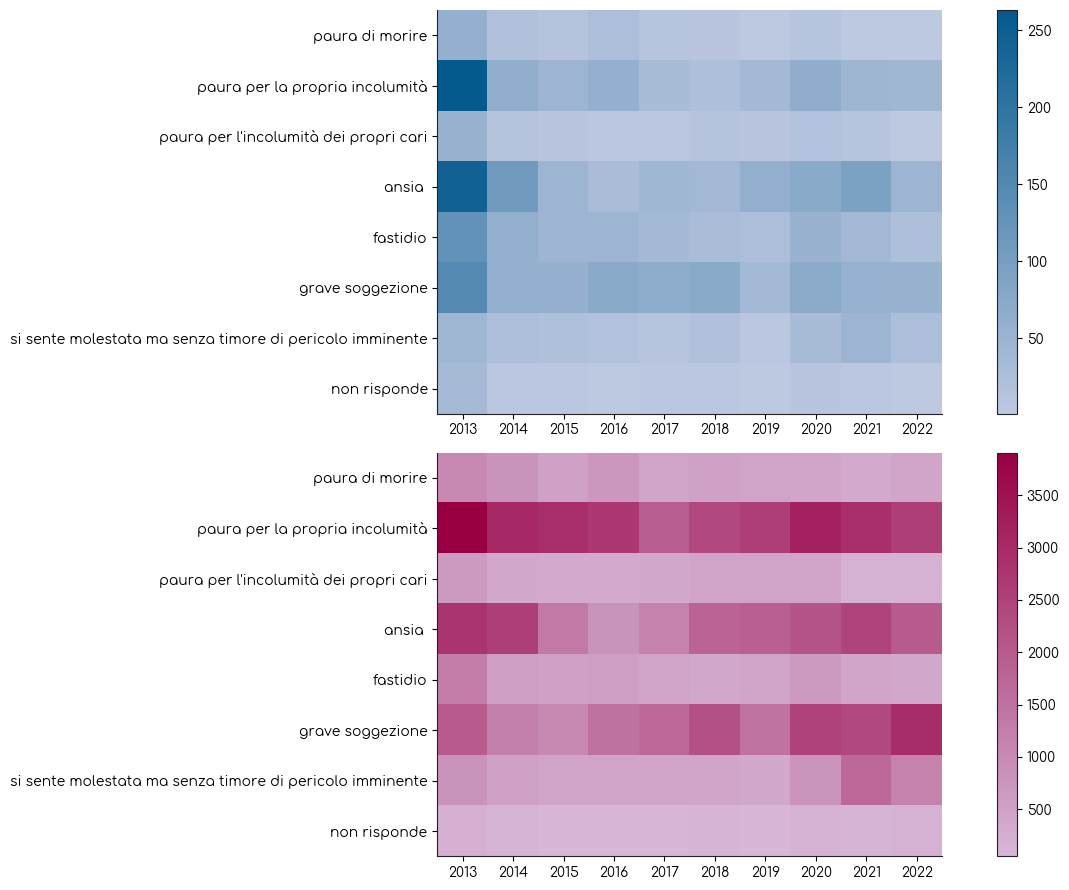

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(12, 9))

subplot_heatmap(axs[0], males_data, males_cmap, showylabels=True)
subplot_heatmap(axs[1], females_data, females_cmap, showylabels=True)

plt.tight_layout()
plt.show()

Solo donne:

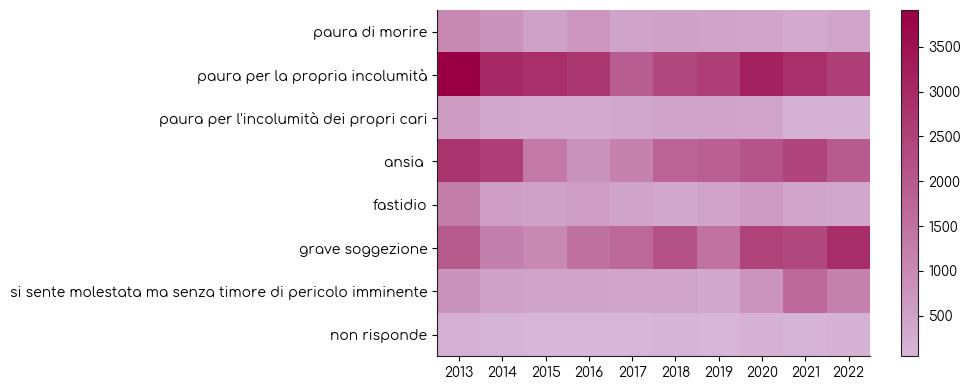

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))

subplot_heatmap(ax, females_data, females_cmap, showylabels=True)

plt.tight_layout()
plt.show()